# Setores Censitários

## Fontes

 https://downloads.ibge.gov.br
 
 https://cidades.ibge.gov.br/brasil/panorama

In [3]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

In [4]:
import os
import zipfile
import shutil

In [5]:
dir = '../01.Dados/Mapas/RJ-SETOR/TEMP'
if not os.path.exists(dir):
    os.makedirs(dir)

In [8]:
filenames = []
for root, dirs, files in os.walk('../01.Dados/Mapas/RJ-SETOR/DADOS'):
    filenames = files
filenames

['33045570506.zip',
 '33045570507.zip',
 '33045570508.zip',
 '33045570509.zip',
 '33045570510.zip',
 '33045570511.zip',
 '33045570512.zip',
 '33045570513.zip',
 '33045570514.zip',
 '33045570515.zip',
 '33045570516.zip',
 '33045570517.zip',
 '33045570519.zip',
 '33045570520.zip',
 '33045570521.zip',
 '33045570522.zip',
 '33045570523.zip',
 '33045570524.zip',
 '33045570525.zip',
 '33045570526.zip',
 '33045570527.zip',
 '33045570528.zip',
 '33045570529.zip',
 '33045570530.zip',
 '33045570531.zip',
 '33045570532.zip',
 '33045570533.zip',
 '33045570534.zip',
 '33045570535.zip',
 '33045570536.zip',
 '33045570537.zip',
 '33045570538.zip',
 '33045570539.zip']

In [12]:
for item in filenames:
    zip_ref = zipfile.ZipFile('../01.Dados/Mapas/RJ-SETOR/DADOS/' + item,'r')
    zip_ref.extractall(dir)
    zip_ref.close()

In [17]:
setor = pd.concat([gpd.read_file(dir + '/' + item[:-4] +'_setor.shp') for item in filenames])


In [18]:
shutil.rmtree(dir)

In [21]:
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<AxesSubplot:>

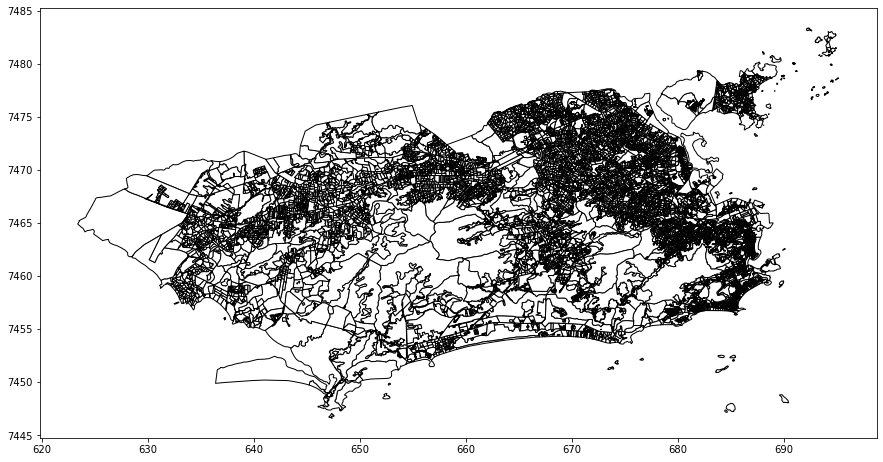

In [23]:
setor.plot(color='white', edgecolor='black', figsize=(15,8))

In [24]:
setor.to_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')